In [0]:
# load important packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statistics as stat

In [0]:
# load datset and check if the dataset has right type of data
df = pd.read_csv('BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [0]:
X = pd.DataFrame(np.c_[df['CRIM'],df['ZN'],df['INDUS'],df['CHAS'],df['NOX'],df['RM'],df['AGE'],df['DIS'],df['RAD'],df['TAX'],df['PTRATIO'],df['B'],df['LSTAT']], columns = ['CRIM',	'ZN',	'INDUS',	'CHAS','NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT'])
Y = df.MEDV

In [0]:
# Splitting the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_predict = regression_model.predict(X_test)
out = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
print("Actual and Predicted Median Price Values for Test Data: ")
out


Actual and Predicted Median Price Values for Test Data: 


,Actual,Predicted
226,37.6,37.563118
292,27.9,32.144451
90,22.6,27.065736
373,13.8,5.670806
273,35.2,35.099826
...,...,...
349,26.6,21.912956
212,22.4,22.394774
156,13.1,13.193354
480,23.0,23.969911


In [0]:
print("RMSE of the model: ",np.sqrt(((Y_predict-Y_test) ** 2).mean()))

RMSE of the model:  4.568292042303191


In [0]:
newX = pd.DataFrame(np.c_[df['CRIM'],df['ZN'],df['CHAS'],df['NOX'],df['RM'],df['DIS'],df['RAD'],df['TAX'],df['PTRATIO'],df['B'],df['LSTAT']], columns = ['CRIM',	'ZN',	'CHAS','NOX','RM','DIS','RAD',	'TAX',	'PTRATIO',	'B','LSTAT'])

In [0]:
# Splitting the data into test and train
newX_train, newX_test, newY_train, newY_test = train_test_split(newX, Y, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model.fit(newX_train, newY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
newY_predict = regression_model.predict(newX_test)
# out = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
# print("Actual and Predicted Median Price Values for Test Data: ")
# out
print("New RMSE after removing INDUS: ",np.sqrt(((newY_predict-newY_test) ** 2).mean()))

New RMSE after removing INDUS:  4.568585265156598


In [0]:
new_X = pd.DataFrame(np.c_[df['CRIM'],df['ZN'],df['CHAS'],df['NOX'],df['RM'],df['DIS'],df['RAD'],df['TAX'],df['PTRATIO'],df['B'],df['LSTAT']], columns = ['CRIM',	'ZN',	'CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO',	'B','LSTAT'])

In [0]:
# Splitting the data into test and train
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_X, Y, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model.fit(new_X_train, new_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
new_Y_predict = regression_model.predict(new_X_test)

print("New RMSE after removing AGES: ",np.sqrt(((new_Y_predict-new_Y_test) ** 2).mean()))


New RMSE after removing AGES:  4.568585265156598


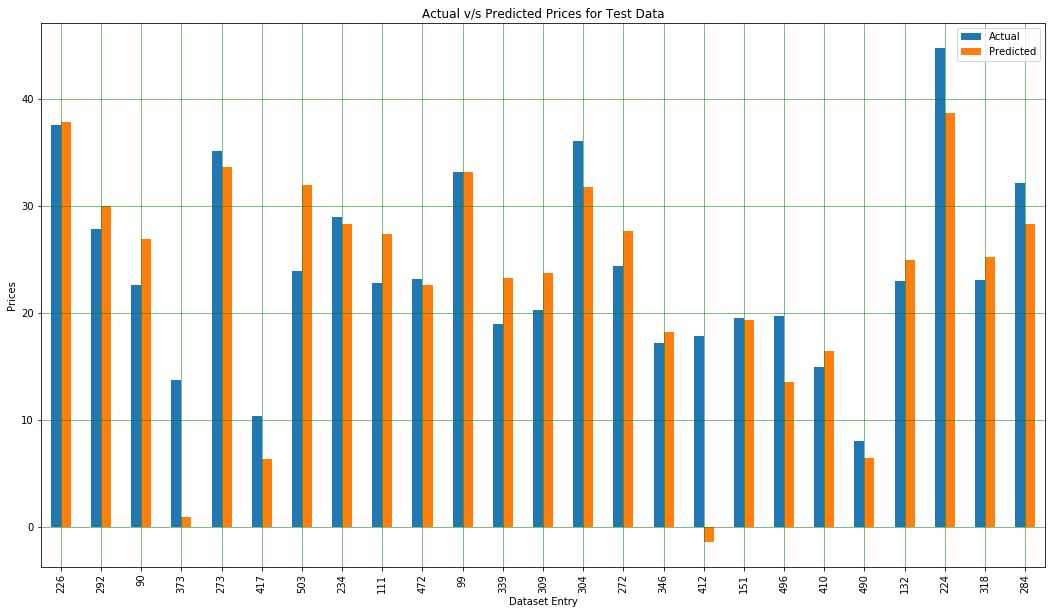

In [0]:
out_few = out.head(25)
out_few.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual v/s Predicted Prices for Test Data")
plt.xlabel("Dataset Entry")
plt.ylabel("Prices")
plt.show()


In [0]:
newOut = pd.DataFrame({'Actual': new_Y_test, 'Predicted': new_Y_predict})
print("Actual and Predicted Median Price Values for Test Data: ")
newOut

Actual and Predicted Median Price Values for Test Data: 


,Actual,Predicted
226,37.6,37.541299
292,27.9,32.156514
90,22.6,27.071353
373,13.8,5.684025
273,35.2,35.112811
...,...,...
349,26.6,21.912551
212,22.4,22.416332
156,13.1,13.192956
480,23.0,23.966483


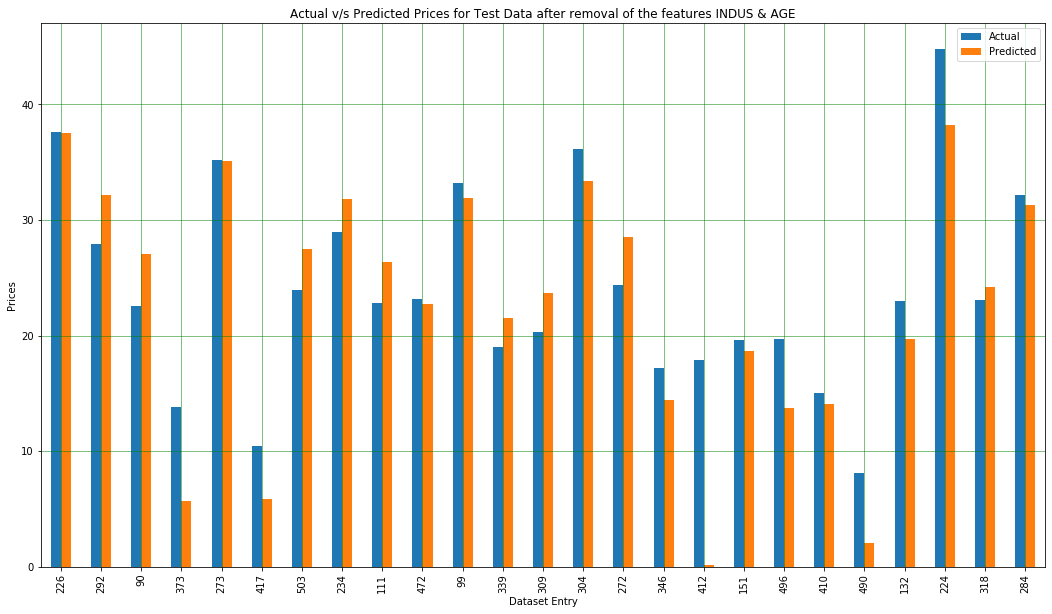

In [0]:
newOut_few = newOut.head(25)
newOut_few.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual v/s Predicted Prices for Test Data after removal of the features INDUS & AGE") 
plt.xlabel("Dataset Entry")
plt.ylabel("Prices")
plt.show()

In [0]:
nX = pd.DataFrame(np.c_[df['CRIM'],df['ZN'],df['CHAS'],df['NOX'],df['RM'],df['DIS'],df['TAX'],df['PTRATIO'],df['B'],df['LSTAT']], columns = ['CRIM',	'ZN',	'CHAS','NOX','RM','DIS','TAX','PTRATIO',	'B','LSTAT'])

In [0]:
# Splitting the data into test and train
nX_train, nX_test, nY_train, nY_test = train_test_split(nX, Y, test_size = 0.2, 
                                                    random_state=5,shuffle='True')


In [0]:
regression_model.fit(nX_train, nY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
nY_predict = regression_model.predict(nX_test)

print("New RMSE after removing RAD: ",np.sqrt(((nY_predict-nY_test) ** 2).mean()))

New RMSE after removing RAD:  5.235280432326558


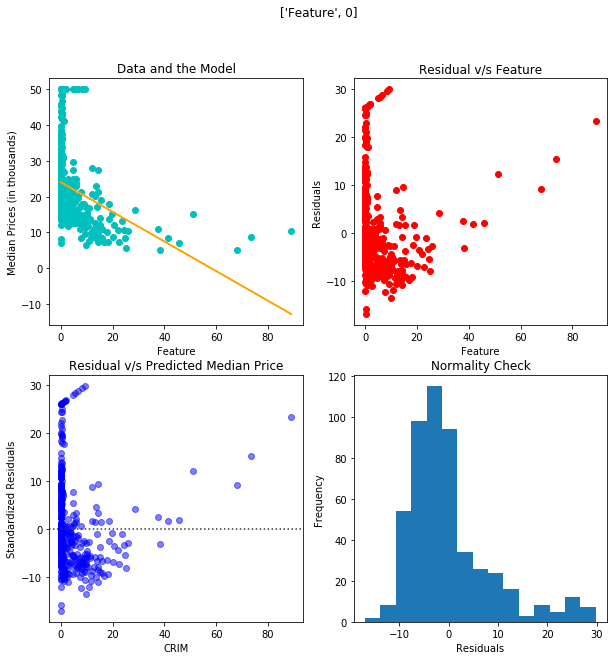

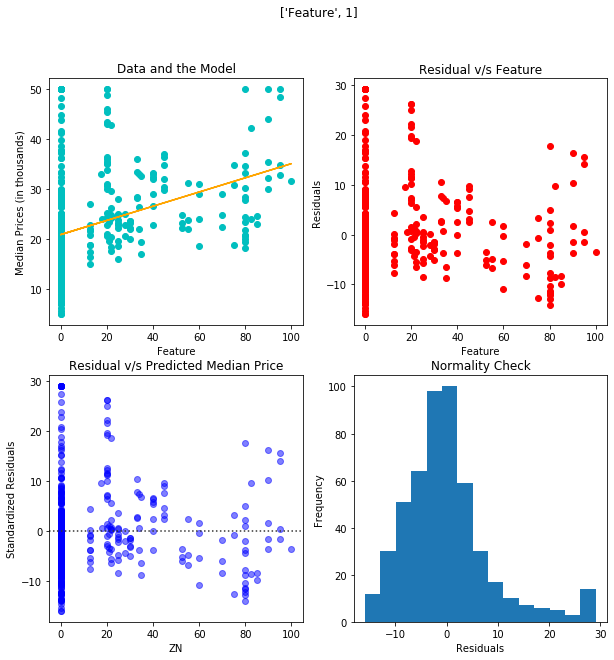

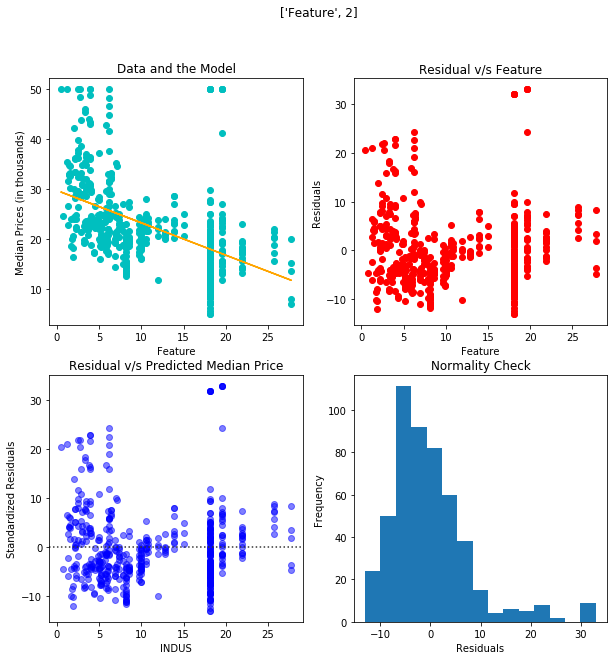

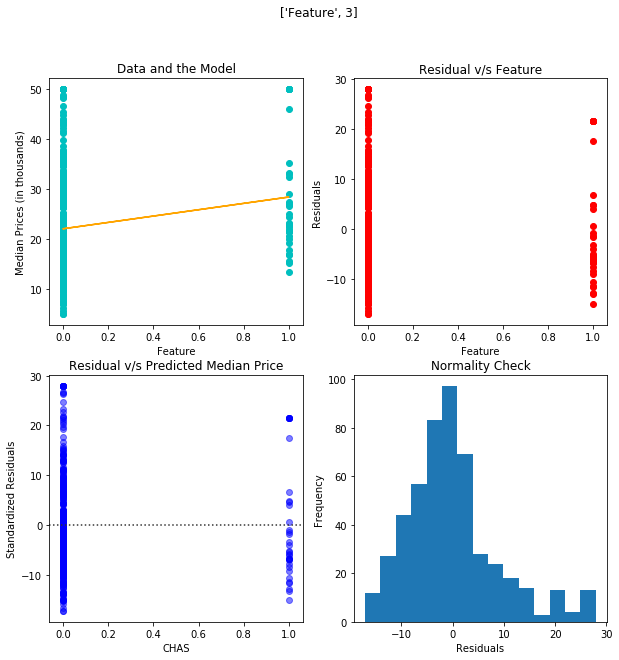

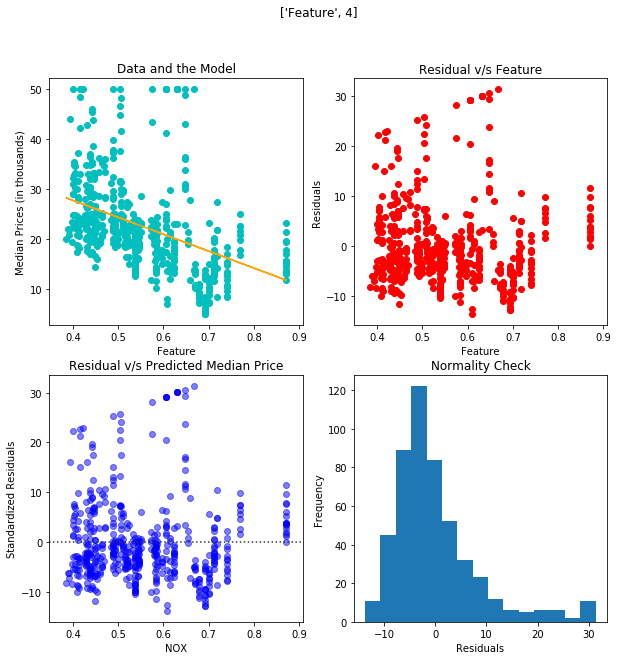

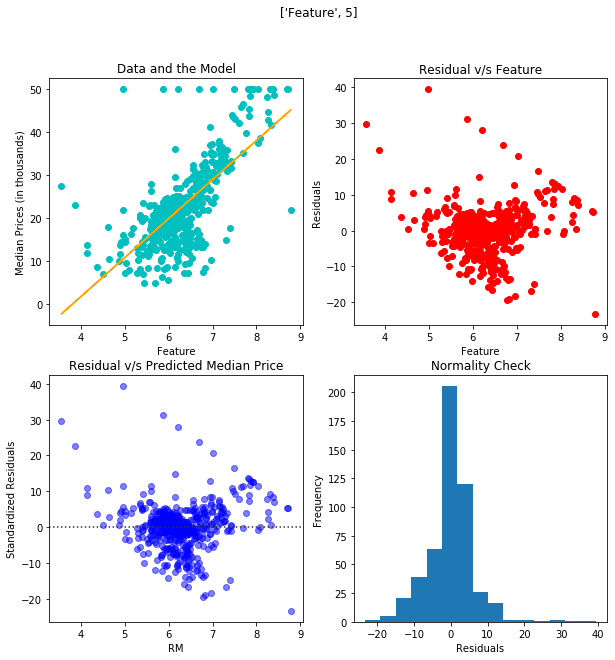

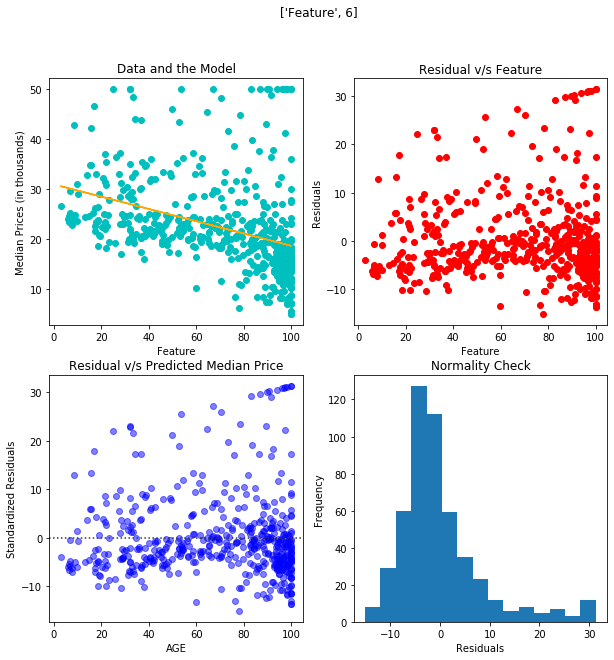

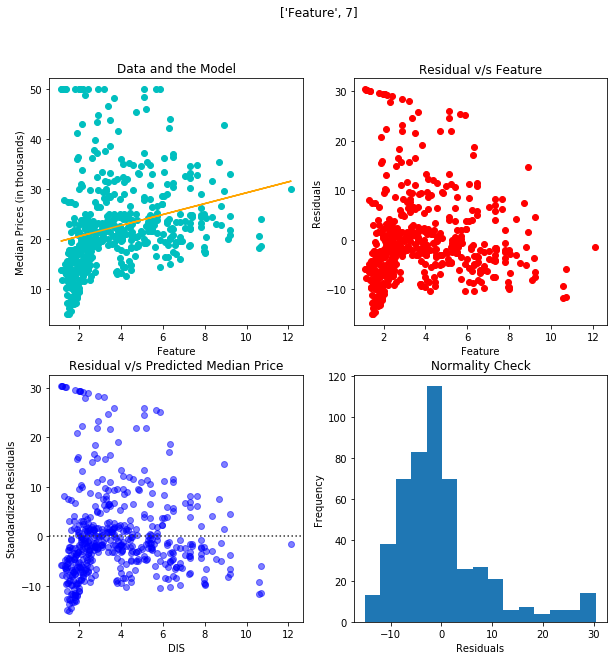

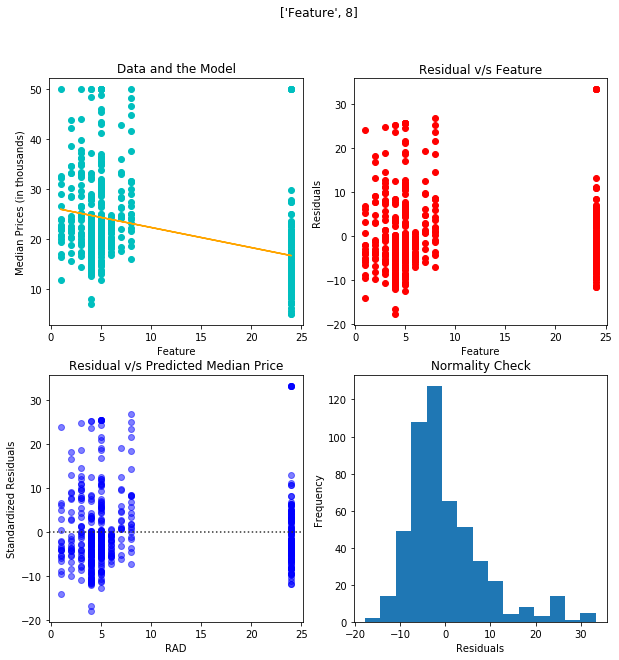

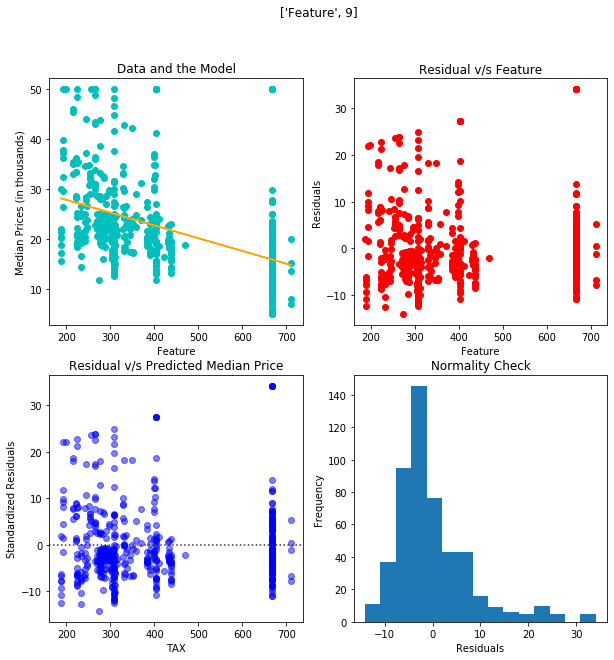

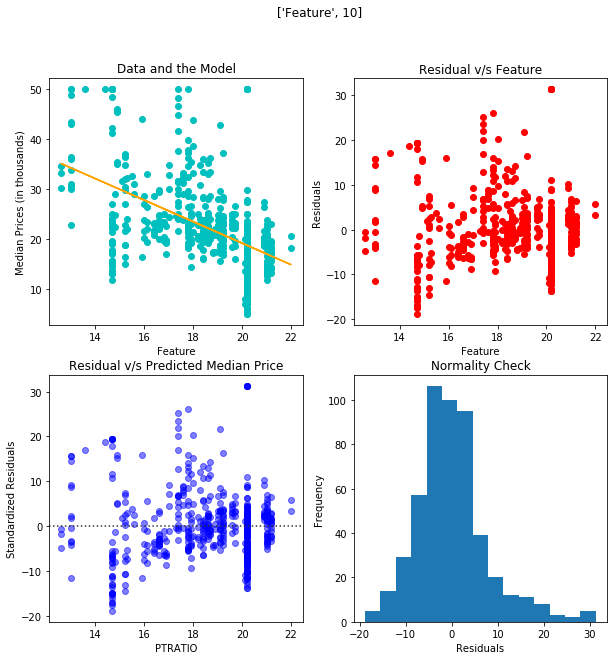

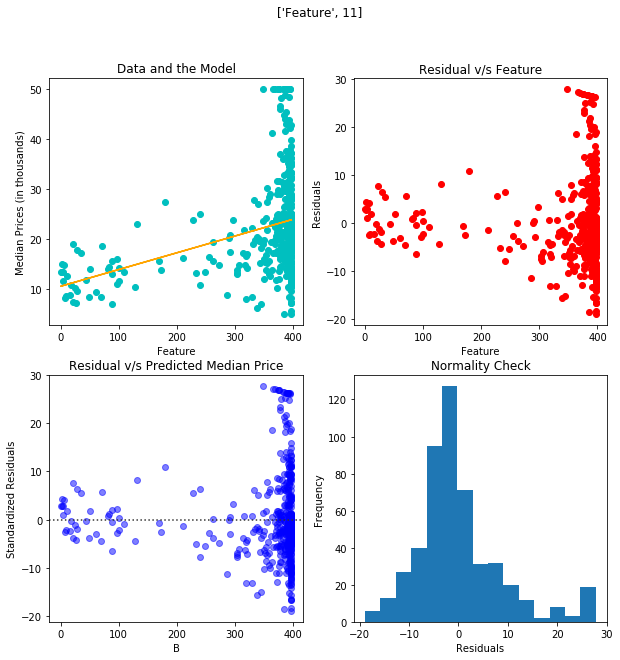

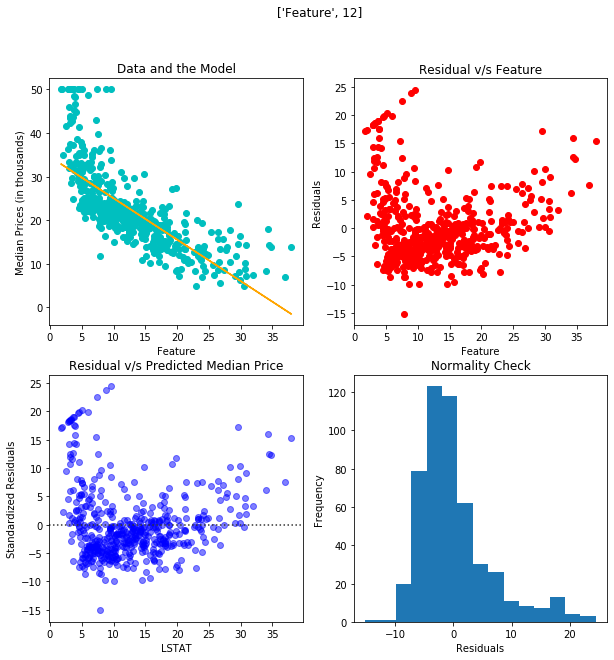

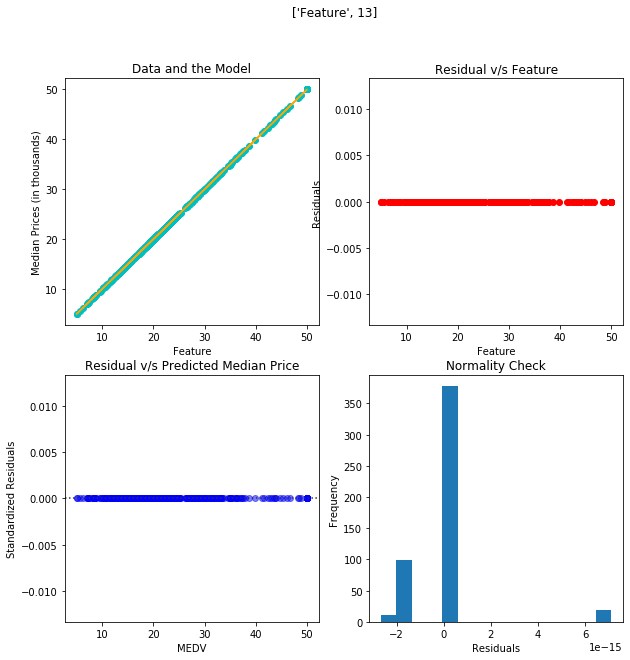

In [0]:
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in features :
  X_feature = df.iloc[:,[i]]
  x_feature = df.iloc[:,[i]]
  np.reshape(X_feature,(-1,1))
  regress = LinearRegression()
  regress.fit(X_feature, Y)
  y_predicted = regress.predict(X_feature)
  res = Y - y_predicted
  std = stat.stdev(res)
  new_res= res/std
  fig,ax =  plt.subplots(2,2,figsize=(10,10))
  # print("Feature ",i)
  fig.suptitle(["Feature",i])
  ax[0][0].scatter(x_feature,Y,marker='o',c='c')
  ax[0][0].plot(X_feature,y_predicted,color='orange')
  ax[0][0].set(xlabel='Feature')
  ax[0][0].set(ylabel='Median Prices (in thousands)')
  ax[0][0].set_title('Data and the Model')
  # plt.show()
  ax[0][1].scatter(x_feature,res,marker='o',c='r')
  ax[0][1].set(xlabel='Feature')
  ax[0][1].set(ylabel='Residuals')
  ax[0][1].set_title('Residual v/s Feature')
  sns.residplot(X_feature,Y,color='blue',ax=ax[1][0], scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
  # ax[1][0].scatter(y_predicted,new_res,marker='o',c='b')
  # ax[1][0].set(xlabel='Predicted Prices')
  ax[1][0].set(ylabel='Standardized Residuals')
  ax[1][0].set_title('Residual v/s Predicted Median Price')
  ax[1][1].hist(res, bins=15)
  ax[1][1].set(xlabel='Residuals')
  ax[1][1].set(ylabel='Frequency')
  ax[1][1].set_title('Normality Check')
  plt.show()
